# Worksheet 06

Name: Youxuan Ma

UID: U23330522

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

The key difference lies in the initialization of centroids:
- K means starts with a random selection of K points from the dataset as the initial centroids.
- Whereas for K means ++:
    1. The first centroid is chosen uniformly at random from the data points.
    2. Subsequent centroids are chosen from the remaining data points with probabilities proportional to the square of their distances to the nearest existing centroid. This approach tends to spread out the initial centroids over the data space.

b) What are some limitations of K means ++?

Some of its limitations include:
1. Sensitivity to the choice of K, the number of clusters.
2. Susceptibility to outliers.
3. Convergence to local minima.
4. Not suitable for categorical data.
5. Dependence on initial centroid:
    - Although K means ++ is designed to select initial centroids that are likely to lead to better clustering, the results can still sometimes be sensitive to these initial positions, especially in complex data landscapes.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

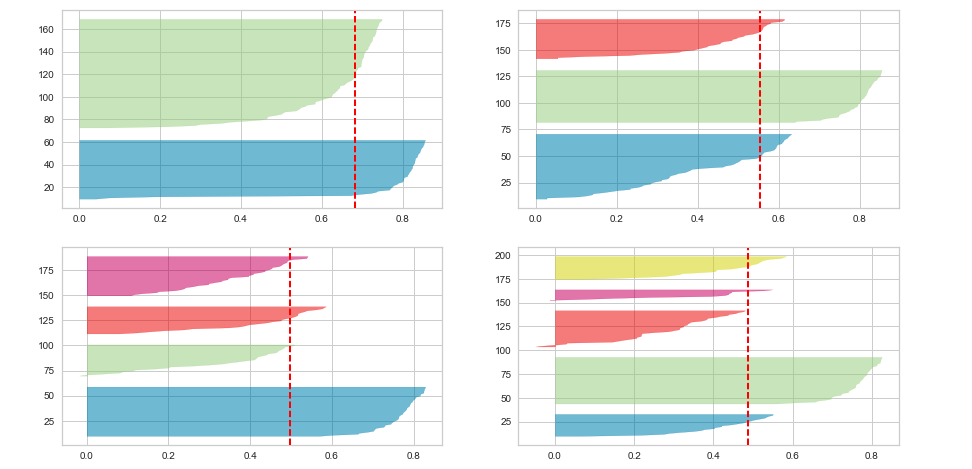

In [14]:
from IPython.display import Image
Image(filename="silhouette.png", width=800, height=800)

The silhouette plot is a graphical representation of how well each data point has been classified in a clustering algorithm. 

A high silhouette score suggests that the data point is well matched to its own cluster and poorly matched to neighboring clusters.

When selecting the optimal number of clusters $ K $, we want to maximize the average silhouette score while also considering the distribution of scores within each cluster. We aim for a higher average silhouette score, but also for smaller variations within each cluster, meaning most data points are closer to the average score.

Interpreting each of the plots for different number of clusters $ K $:

- $K=2$: The majority of the data points have a silhouette score above the average, with a relatively tight grouping. The scores are generally high, which indicates good separation and cohesion.

- $K=3$: The silhouette scores for one of the clusters are well above the average, but the other two clusters have scores that dip below the average. This indicates that while one cluster is well-defined, the other two are less cohesive or less well-separated from the others.

- $K=4$: Here, we see more variation in silhouette scores within each cluster. Some clusters have many points below the average silhouette score, which suggests that adding a fourth cluster may not have improved the clustering quality significantly.

- $K=5$: The plot shows one cluster with scores predominantly below the average, and the overall distribution of scores across clusters is more uneven than with fewer clusters. This suggests that some clusters may be forced or not well-separated.

Therefore, based on the silhouette plots and my analysis above, I would choose $ K = 2 $ number of clusters. Since the clusters have the highest average silhouette score, indicating strong cluster structure. Also, the scores are most consistently above the average, suggesting that most data points are well-clustered.

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |$\sqrt{2}$|3|1|$2\sqrt{2}$|
| B |$\sqrt{2}$| 0 |$\sqrt{5}$|1|$\sqrt{2}$|
| C |3|$\sqrt{5}$| 0 |$\sqrt{10}$|$\sqrt{5}$|
| D |1|1|$\sqrt{10}$| 0 |$\sqrt{5}$|
| E |$2\sqrt{2}$|$\sqrt{2}$|$\sqrt{5}$|$\sqrt{5}$| 0 |

Step 2

|   |A&D| B | C | E |
|---|---|---|---|---|
|A&D| 0 | 1 | 3 | $\sqrt{5}$ |
| B |1| 0 |$\sqrt{5}$|$\sqrt{2}$|
| C |3|$\sqrt{5}$| 0 |$\sqrt{5}$|
| E |$\sqrt{5}$|$\sqrt{2}$|$\sqrt{5}$| 0 |

Step 3

|   |A&B&D|C| E |
|---|---|---|---|
|A&B&D| 0 |$\sqrt{5}$|$\sqrt{2}$|
| C |$\sqrt{5}$| 0 |$\sqrt{5}$|
| E |$\sqrt{2}$|$\sqrt{5}$| 0 |

Step 4

|   |A&B&D&E|C|
|---|---|---|
|A&B&D&E| 0 |$\sqrt{5}$|
|C|$\sqrt{5}$| 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |$\sqrt{2}$|3|1|$2\sqrt{2}$|
| B |$\sqrt{2}$| 0 |$\sqrt{5}$|1|$\sqrt{2}$|
| C |3|$\sqrt{5}$| 0 |$\sqrt{10}$|$\sqrt{5}$|
| D |1|1|$\sqrt{10}$| 0 |$\sqrt{5}$|
| E |$2\sqrt{2}$|$\sqrt{2}$|$\sqrt{5}$|$\sqrt{5}$| 0 |

Step 2

|   |A&D| B | C | E |
|---|---|---|---|---|
|A&D| 0 |$\sqrt{2}$| $\sqrt{10}$ | $2\sqrt{2}$ |
| B |$\sqrt{2}$| 0 |$\sqrt{5}$|$\sqrt{2}$|
| C |$\sqrt{10}$|$\sqrt{5}$| 0 |$\sqrt{5}$|
| E |$2\sqrt{2}$|$\sqrt{2}$|$\sqrt{5}$| 0 |

Step 3

|   |A&D|B&E|C|
|---|---|---|---|
|A&D| 0 |$2\sqrt{2}$|$\sqrt{10}$|
|B&E|$2\sqrt{2}$| 0 |$\sqrt{5}$|
|C|$\sqrt{10}$|$\sqrt{5}$| 0 |

Step 4

|   |A&D|B&C&E|
|---|---|---|
|A&D| 0 |$\sqrt{10}$|
|B&C&E|$\sqrt{10}$| 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

In [15]:
sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

/var/folders/rk/d231yld50zg5zv7g8h__51ym0000gn/T/ipykernel_21068/3364156272.py:18: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='single')


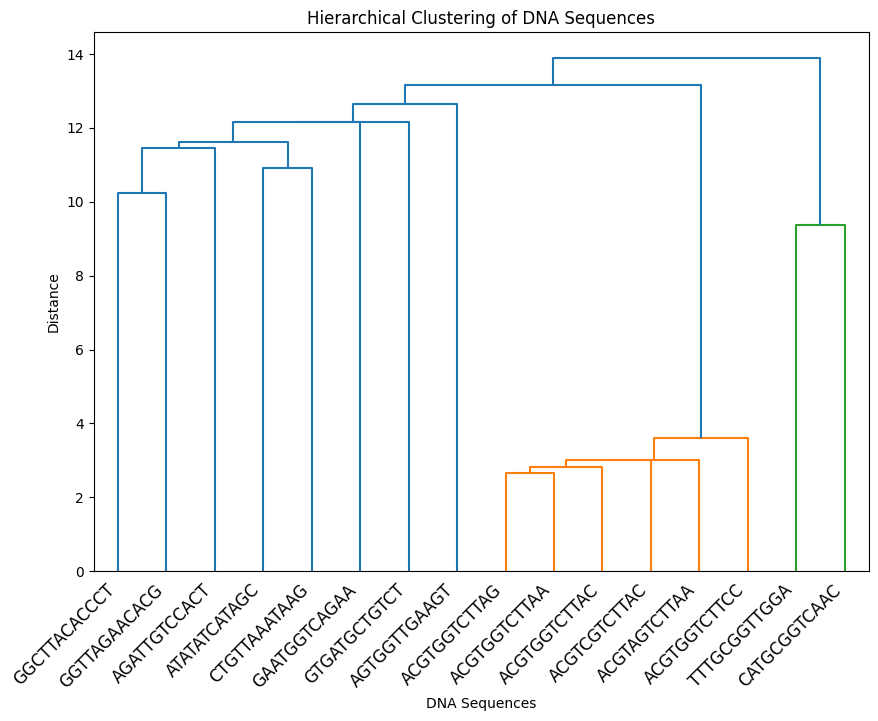

In [16]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def hamming_distance(s, t):
    assert len(s) == len(t), "Sequences must be of equal length."
    return sum(1 for x, y in zip(s, t) if x != y)

def hierarchical_clustering(sequences):
    n = len(sequences)
    distance_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            distance = hamming_distance(sequences[i], sequences[j])
            distance_matrix[i, j] = distance_matrix[j, i] = distance
            
    linkage_matrix = linkage(distance_matrix, method='single')
    plot_dendrogram(linkage_matrix, sequences)

def plot_dendrogram(linkage_matrix, labels):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, orientation='top', labels=labels, distance_sort='descending', show_leaf_counts=True)
    plt.title('Hierarchical Clustering of DNA Sequences')
    plt.xlabel('DNA Sequences')
    plt.ylabel('Distance')
    plt.xticks(rotation=45, ha='right')
    plt.show()

hierarchical_clustering(sequences)
